# Import Modul

In [1]:
# from tensorflow.keras.datasets import mnist                                     # Untuk mendownload dataset MNIST

In [2]:
from matplotlib import pyplot as plt                                            # Untuk Visualisasi
from sklearn.ensemble import HistGradientBoostingClassifier                     # Untuk mengimport modul Gradien Bossting Classifier
from sklearn import svm                                                         # Untuk mengimport modul Support Vector Machine
from sklearn import tree                                                        # Untuk mengimport modul Decicion Tree
from sklearn.naive_bayes import GaussianNB                                      # Untuk mengimport modul naive bayes

In [83]:
import numpy as np
import pickle

# Load Data Online

In [3]:
# # load dataset
# (trainX, trainy), (testX, testy) = mnist.load_data()
# # summarize loaded dataset
# print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testy.shape))


# Load Data Offline

In [40]:
trainX = np.load("trainX.npy")
trainy = np.load("trainy.npy")

testX = np.load("testX.npy")
testy = np.load("testy.npy")

Kode diatas adalah langkah untuk melakukan proses download data dengan menggunakan modul `mnist.load_data()`. Selanjutnya data tersebut akan di simpan dalam variabel `trainX`,`trainy`,`testX`,`testy` dan jika sudah memahami konsep `suvervised learning` data tersebut sangat dibutuhkan untuk proses pelatihan dan pengujian. Mehtod `.shape` merupakan cara untuk mengetahui ukuran array data pada suatu variabel. `(60000,28,28)` menyatakan sebuah tensor yang merupakan dimensi yang lebih tinggi dari matriks, maksud dari angka tersebut adalah pada variabel tersebut terdapat 60000 rekord/baris matriks yang berukuran 28 x 28.

> Note : Bagi yang belum memahami konsep supervised learning dapat melihat vidio berikut ini : https://www.youtube.com/watch?v=5RosIBjSbFc

Untuk lebih jelasnya kita akan melihat beberapa data pada data tersebut.

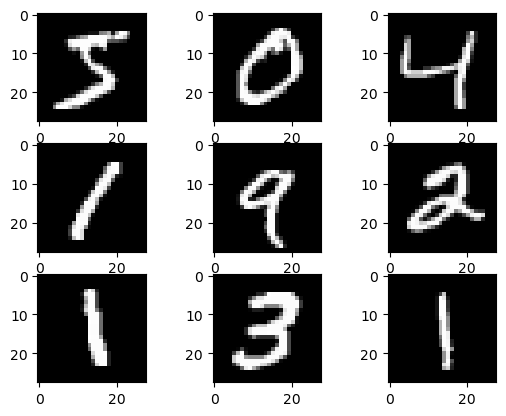

In [41]:
# plot first few images
for i in range(9):                                                              # melakukan perulangan dari 0 sampai 8 maksud in range(9) => [0,1,2,3,4,5,6,7,8]. index awal python = 0
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))                               # Data yang divisualisasikan adalah data dari trainX[i]. Yang berarti trainX record ke-1, ke-2, ..., ke-8
# show the figure
plt.show()

Dari data yang diberikan belum jelas bagaimana isi data tersebut dapat diubah dari data gambar digital kedalam sebuah data array. Oleh sebab itu, kita akan visualisasikan salah satu data tersebut berupa visualisasi dan nilai tiap pixelnya sebagai berikut.

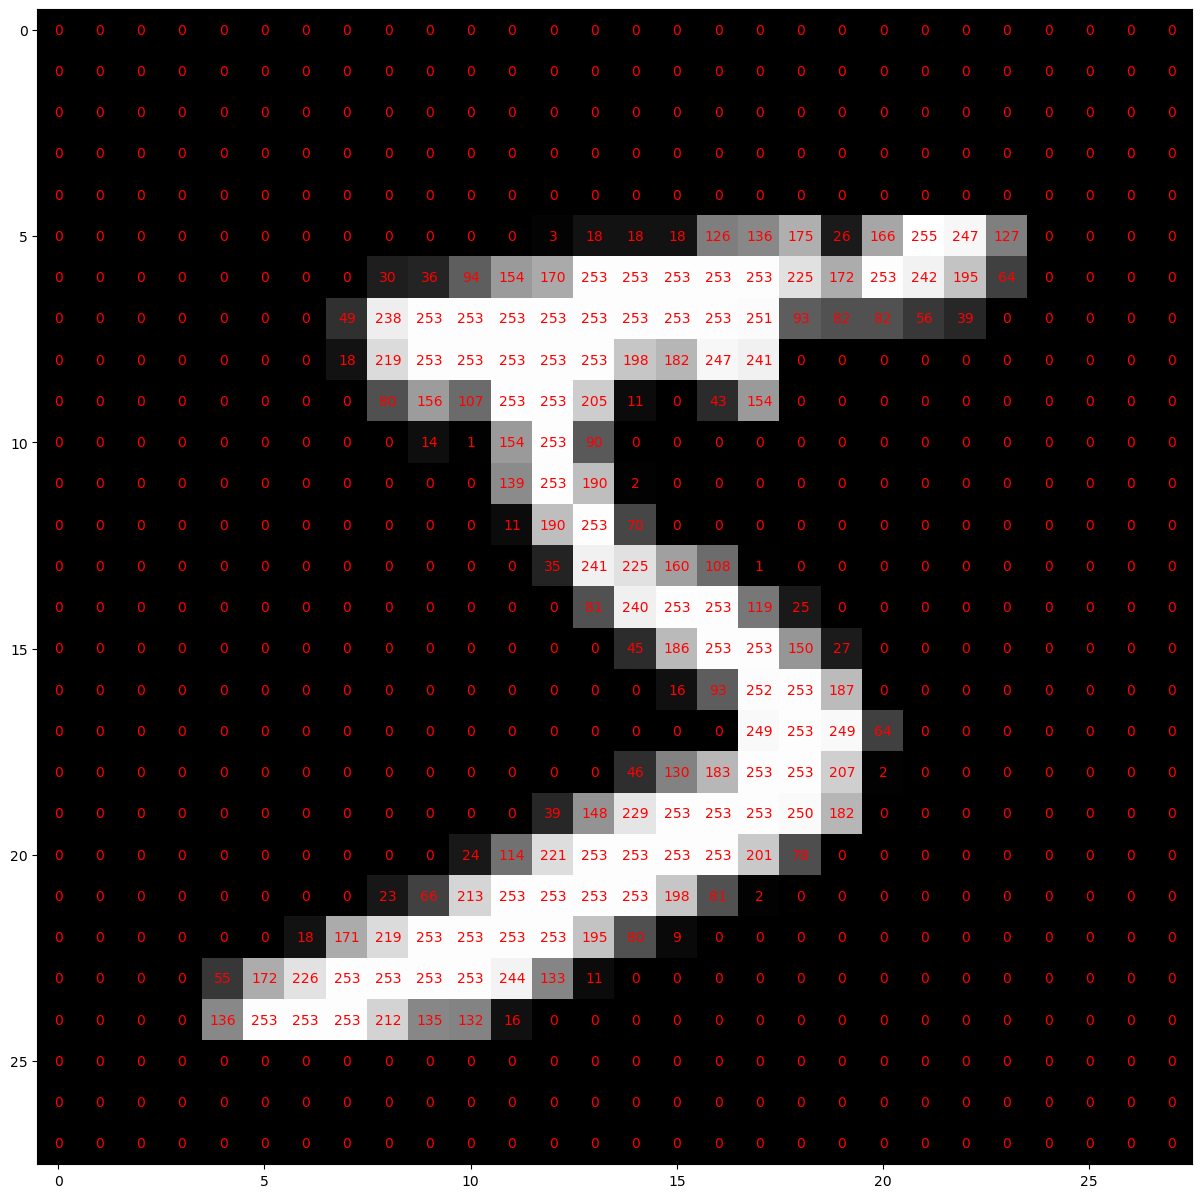

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(trainX[0], cmap='gray')

for i in range(trainX[0].shape[0]):
    for j in range(trainX[0].shape[1]):
        ax.text(j, i, str(trainX[0][i, j]), color='r', ha='center', va='center')

Dari visualisasi diatas kita dapat memahami bagaimana proses data gambar diubah menjadi sebuah array.

# Data Preparation

Sebelum memasuki proses klasifikasi maka data akan dicek terlebih dahulu apakah data tersebut sudah sesuai atau belum. Pada kasus Machine Learning biasa data yang dibutuhkan adalah data tabular bukan berupa data berbentuk matriks.

> Note : Data tabular adalah data yang berupa vektor (1 dimensi)

In [43]:
print('Ukuran trainX :',trainX.shape)
print('Ukuran trainX :',testX.shape)

Ukuran trainX : (60000, 28, 28)
Ukuran trainX : (10000, 28, 28)


Kita melihat kembali variabel `trainX` dan `testX` masih dalam bentuk tensor tujuan kita adalah merubah dari ukuran `(60000, 28, 28)` menjadi `(60000, 784)` dimana 784 diperoleh dari **(28x28) = 784**

Mari perhatikan langkah berikut:

In [44]:
X_train = trainX.copy()
X_test = testX.copy()

Method `.copy()` digunakan untuk menyalin data pada sebuah variabel. Terkadang dengan metode lain sebagai contoh seperti berikut

```py
X_train = trainX
X_test = testX
```

Jika pada variabel `X_train` atau `X_test` dirubah maka akan merubah isi dari data pada variabel `trainX` atau `testX`. Oleh karena itu, langkah yang aman menggunakan method `copy()`.

In [45]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Pada pelajaran **Aljabar Linear** kita mengenal rank. Jika sebuah matriks maka rank = 2. Oleh karena itu, kita akan mencoba untuk membuktikan bahwa setiap record yang ada adalah sebuah matriks dengan menggunakan method `ndim` seperti berikut.

In [46]:
X_train[0].ndim

2

Dengan menggunakan pembuktian tersebut jelas bahwa data tersebut adalah sebuah matriks.

Kembali lagi ke pembahasan untuk mengetahui ukuran data dapat menggunakan kode berikut:

In [47]:
trainX.shape

(60000, 28, 28)

Dapat melihat bahwa sejatinya data tersebut adalah sebuah urutan tuple. Tujuan kita adalah untuk mengambil data ukuran baris dan kolom. Jika kita lihat kita akan mengambil *28* dan *28*. Jika diurutkan data tersebut berada diurutan ke 1 dan 2.

> Note : Jika belum paham terkait tuple dan urutan index silahkan mencari materi yang relevan untuk mengetahui hal tersebut.

Sehingga jika kita ingin mengambil nilai 28 untuk baris adalah sebagai berikut

In [48]:
X_train.shape[1]

28

Untuk mengambil nilai 28 untuk kolom sebagai berikut

In [49]:
X_train.shape[2]

28

Strategi dalam mengubah rank menjadi rank = 1 adalah melakukan pembentukan kembali. Dimana jika pada kasus ini dapat menggunakan mehtod `reshape(x,y,z,...)` dimana x, y, z merupakan ukuran yang diinginkan. Tujuan kita adalah untuk merubah data dari ukuran (60000, 28, 28) menjadi (60000, 728) yang diperoleh dengan cara mengalikan `X_train.shape[1]` dengan `X_train.shape[1]`. yang berarti kita hanya butuh method dengan `reshape(60000,728)`. Akan tetapi, jika data yang digunakan berubah maka ukuran tersebut juga berubah. Untuk memberikan kesan otomatis maka method tersebut dipermudah dengan cara `reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])`

In [50]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[1])

In [51]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [52]:
X_train.shape
X_test.shape
testy.shape

(10000,)

# Model

# SVM

In [53]:
X_train.shape

(60000, 784)

In [54]:
trainy.shape

(60000,)

In [56]:
model_svm = svm.SVC(probability=True)
model_svm.fit(X_train, trainy)

SVC(probability=True)

In [57]:
supportvector = model_svm.support_vectors_
support = model_svm.support_
n_support = model_svm.n_support_

In [58]:
predict_svm = model_svm.predict(X_test)

In [59]:
print('Akurasi : ',sum(predict_svm==testy)/len(predict_svm)*100,'%')

Akurasi :  97.92 %


In [60]:
predict_proba =  model_svm.predict_proba(X_test)

# Naive Bayes

In [61]:
model_nb = GaussianNB()

In [62]:
model_nb.fit(X_train, trainy)

GaussianNB()

In [63]:
predict_nb = model_nb.predict(X_test)

In [64]:
print('Akurasi : ',sum(predict_nb==testy)/len(predict_nb)*100,'%')

Akurasi :  55.58 %


In [65]:
predict_proba_nb =  model_nb.predict_proba(X_test)

In [66]:
predict_nb[0]

9

In [67]:
predict_proba_nb[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40883491e-52,
       0.00000000e+00, 1.00000000e+00])

# Decicion Tree

In [68]:
model_dt = tree.DecisionTreeClassifier()

In [69]:
model_dt.fit(X_train, trainy)

DecisionTreeClassifier()

In [70]:
predict_dt = model_dt.predict(X_test)

In [71]:
print('Akurasi : ',sum(predict_dt==testy)/len(predict_dt)*100,'%')

Akurasi :  87.79 %


In [72]:
predict_proba_dt = model_dt.predict_proba(X_test)

In [73]:
predict_dt[10]

0

In [74]:
predict_proba_dt[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Gradien Boosting

In [75]:
model_gb = HistGradientBoostingClassifier(max_iter=100)

In [76]:
model_gb.fit(X_train,trainy)

HistGradientBoostingClassifier()

In [77]:
predict_gb = model_gb.predict(X_test)

In [78]:
print('Akurasi : ',sum(predict_gb==testy)/len(predict_gb)*100,'%')

Akurasi :  97.89 %


In [79]:
predict_proba_gb = model_gb.predict_proba(X_test)

In [80]:
predict_gb[1]

2

In [81]:
predict_proba_gb[1]

array([2.98843506e-05, 6.43665324e-05, 9.99343363e-01, 1.22283636e-04,
       1.15597553e-06, 9.22949834e-06, 3.69653707e-04, 2.62858143e-07,
       5.94199228e-05, 3.80406064e-07])

# Implement Model

In [84]:
filename = 'svm_model.sav'
pickle.dump(model_svm, open(filename, 'wb'))

In [85]:
# load the model from disk
svm_load = pickle.load(open(filename, 'rb'))

In [86]:
predict_svm = svm_load.predict(X_test)

In [87]:
predict_svm

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [88]:
from PIL import Image

In [135]:
X_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [133]:
load_img_rz = np.array(Image.open('MNIST_44_0.png').resize((28,28)))

In [134]:
load_img_rz

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   1],
        ...,
        [  0,   0,   0,   1],
        [  0,   0,   0,   1],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0, 139],
        [  0,   0,   0, 201],
        ...,
        [  0,   0,   0, 201],
        [  0,   0,   0, 176],
        [  0,   0,   0,  11]],

       [[  0,   0,   0,   0],
        [  0,   0,   0, 180],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 229],
        [  0,   0,   0,  14]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0, 181],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 229],
        [  0,   0,   0,  14]],

       [[  0,   0,   0,   0],
        [  0,   0,   0, 136],
        [  0,   0,   0, 197],
        ...,
        [  0,   0,   0, 197],
        [  0,   0,   0, 172],
        [  0,   0,   0,  11]],

       [[  0

In [130]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [131]:
load_img_rz.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [132]:
load_img_rz.flatten().shape

(3136,)

In [123]:
X_test[0].shape

(784,)

In [126]:
svm_load.predict([load_img_rz.flatten()])

array([5], dtype=uint8)

In [136]:
import random

In [138]:
len(X_test)

10000

In [158]:
random.randrange(0, len(X_test), 1)

9709

In [160]:
testy[9709]

5

<center>Hobi Data $©$ 2023 <br>
Contributor : Joko Eliyanto, Indra Cahya Ramdani
</center>

